what happend in this notebook:
* EDA
* Data Visualization
* Feature Selection
* Binary Classification
* Multi-class Classification

Models that used:
* Linear Support Vector Machine Classifier with Linear Kernel (Binary Classification)
* Quadratic Support Vector Machine Classifier (Binary Classification)
* K-nearest-neighbor Classifier (Binary Classification)
* Long Short-Term Memory Classifier (Binary Classification)
* K-nearest-neighbor Classifier (Multi-class Classification)
* Multi Layer Perceptron Classifier (Multi-class Classification)

# **Required Packages**

In [1]:
# importing required libraries
import numpy as np
import pandas as pd

import pickle # saving and loading trained model
from os import path

# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import (StandardScaler, OrdinalEncoder,LabelEncoder, MinMaxScaler, OneHotEncoder)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer, MaxAbsScaler , RobustScaler, PowerTransformer

# importing library for plotting
import matplotlib.pyplot as plt
#plt.rcParams.update({'font.size': 22})

import seaborn as sns

import joblib
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS # for feature selection 

# importing library for support vector machine classifier
from sklearn.svm import SVC
# importing library for K-neares-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
# importing library for Linear Discriminant Analysis Model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# importing library for Quadratic Discriminant Analysis Model
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn import metrics
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

import tensorflow as tf
from tensorflow.keras.utils import to_categorical

from keras.layers import Dense # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.models import model_from_json # saving and loading trained model

from keras.layers import LSTM
from keras.layers import Input
from keras.models import Model

# representation of model layers
from keras_vis.utils import vis_utils
from keras.utils.vis_utils import plot_model

ModuleNotFoundError: No module named 'numpy'

# **Reading And Understanding Data**

* Load dataset
* Some statistical Computation







## Reading Data

Have you ever wondered how your computer/network is able to avoid being infected with malware and bad traffic inputs from the internet? 
The reason why it can detect it so well is because there are systems in place to protect your valuable information held in your computer or networks. These systems that detect malicious traffic inputs are called **Intrusion Detection Systems (IDS)** and are **trained on internet traffic record data**. **The most common data set** is the **NSL-KDD**, and is the benchmark for modern-day internet traffic.

This data set is comprised of **four sub data sets**: **KDDTest+**, **KDDTest-21**,** KDDTrain+**, **KDDTrain+_20Percent**, although **KDDTest-21** and **KDDTrain+_20Percent are subsets of the KDDTrain+ and KDDTest+**. From now on, **KDDTrain+ will be referred to as train** and **KDDTest+ will be referred to as test**. The **KDDTest-21 is a subset of test, without the most difficult traffic records (Score of 21)**, and the **KDDTrain+_20Percent is a subset of train**, whose record count makes up** 20% of the entire train dataset**. That being said, the traffic records that exist in the KDDTest-21 and KDDTrain+_20Percent are already in test and train respectively and aren’t new records held out of either dataset.

These data sets contain the **records of the internet traffic** seen by a simple intrusion detection network and are the ghosts of the traffic encountered by a real IDS and just the traces of its existence remains. The data set contains **43 features** per record, with **41 of the features referring to the traffic input** itself and the **last two are labels** (whether it is a normal or attack) and **Score** (the severity of the traffic input itself).

In [ ]:
train = '../input/nslkdd/KDDTrain+.txt'
test = '../input/nslkdd/KDDTest+.txt'
test21 = '../input/nslkdd/KDDTest-21.txt'

In [ ]:
feature=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot",
          "num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells",
          "num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate",
          "rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count", 
          "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate",
          "dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty"]

flag=['OTH','RSTOS0','SF','SH','RSTO','S2','S1','REJ','S3','RSTR','S0']

protocol_type=['tcp','udp','icmp']

service=['http','smtp','finger','domain_u','auth','telnet','ftp','eco_i','ntp_u','ecr_i','other','private','pop_3','ftp_data',
                  'rje','time','mtp','link','remote_job','gopher','ssh','name','whois','domain','login','imap4','daytime','ctf','nntp',
                  'shell','IRC','nnsp','http_443','exec','printer','efs','courier','uucp','klogin','kshell','echo','discard','systat',
                  'supdup','iso_tsap','hostnames','csnet_ns','pop_2','sunrpc','uucp_path','netbios_ns','netbios_ssn','netbios_dgm',
                  'sql_net','vmnet','bgp','Z39_50','ldap','netstat','urh_i','X11','urp_i','pm_dump','tftp_u','tim_i','red_i','icmp',
                  'http_2784','harvest','aol','http_8001']

binary_attack=['normal','ipsweep', 'nmap', 'portsweep','satan', 'saint', 'mscan','back', 'land', 'neptune', 'pod', 'smurf',
               'teardrop', 'apache2', 'udpstorm', 'processtable','mailbomb','buffer_overflow', 'loadmodule', 'perl', 'rootkit',
               'xterm', 'ps', 'sqlattack','ftp_write', 'guess_passwd', 'imap', 'multihop','phf', 'spy', 'warezclient',
               'warezmaster','snmpgetattack','named', 'xlock', 'xsnoop','sendmail', 'httptunnel', 'worm', 'snmpguess']

multiclass_attack={ 'normal': 'normal',
        'probe': ['ipsweep.', 'nmap.', 'portsweep.','satan.', 'saint.', 'mscan.'],
        'dos': ['back.', 'land.', 'neptune.', 'pod.', 'smurf.','teardrop.', 'apache2.', 'udpstorm.', 'processtable.','mailbomb.'],
        'u2r': ['buffer_overflow.', 'loadmodule.', 'perl.', 'rootkit.','xterm.', 'ps.', 'sqlattack.'],
        'r2l': ['ftp_write.', 'guess_passwd.', 'imap.', 'multihop.','phf.', 'spy.', 'warezclient.', 'warezmaster.','snmpgetattack.',
                   'named.', 'xlock.', 'xsnoop.','sendmail.', 'httptunnel.', 'worm.', 'snmpguess.']}  

In [ ]:
train_data=pd.read_csv(train,names=feature)
test_data=pd.read_csv(test,names=feature)

In [ ]:
test_21 = pd.read_csv(test21, names= feature)

In [ ]:
train_data

In [ ]:
# remove attribute 'difficulty_level'
train_data.drop(['difficulty'],axis=1,inplace=True)
train_data.shape

## Data Type Checking and Statistical Reports

In [ ]:
train_data.info()

In [ ]:
train_data.describe().T

In [ ]:
# number of attack labels 
train_data['label'].value_counts()

# **Data Analysis**


*   Data Visualization
*   Data Mining



## **Univariate Analysis**

In [ ]:
def bar_graph(feature):
  train_data[feature].value_counts().plot(kind="bar")

### Label

In [ ]:
# number of attack labels 
train_data['label'].value_counts()

In [ ]:
bar_graph('label')

Within the data set exists **4 different classes of attacks**: 

*   **Denial of Service (DoS)**
*   **Probe**
*   **User to Root(U2R)**
*   **Remote to Local (R2L)**











**DoS** is an attack that **tries to shut down traffic flow** to and from the target system. **The IDS is flooded with an abnormal amount of traffic**, which the **system can’t handle**, and **shuts down to protect itself**. This prevents normal traffic from visiting a network. An example of this could be an online retailer getting flooded with online orders on a day with a big sale, and because the network can’t handle all the requests, it will shut down preventing paying customers to purchase anything. **This is the most common attack in the data set**.

**Probe** or surveillance is an attack that **tries to get information from a network**. The goal here is to act like a thief and **steal important information**, whether it be personal information about clients or banking information.

**U2R** is an attack that **starts off with a normal user account** and **tries to gain access to the system or network, as a super-user (root)**. The attacker attempts to exploit the vulnerabilities in a system to **gain root privileges/access**.

**R2L** is an attack that tries to **gain local access to a remote machine**. **An attacker does not have local access to the system/network**, and tries to “hack” their way into the network.

It is noticed from the descriptions above that **DoS acts differently from the other three attacks**, where **DoS attempts to shut down a system to stop traffic flow altogether**, whereas the **other three attempts to quietly infiltrate the system undetected**.

In the table below, a breakdown of the **different subclasses of each attack** that exists in the data set is shown:

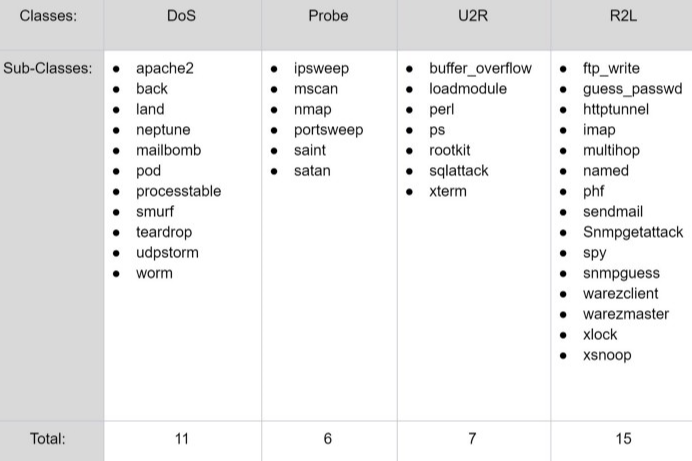

In [ ]:
# changing attack labels to their respective attack class
def change_label(df):
  df.label.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
  df.label.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)      
  df.label.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
  df.label.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)



In [ ]:
change_label(train_data)

In [ ]:
# distribution of attack classes
train_data.label.value_counts()

In [ ]:
bar_graph('label')

In [ ]:
# distribution of attack classes
train_data.label.value_counts()

### Protocol


*   **Attribute No.** : 2

*   **Attribute Name.** : Protocol_type

*   **Description** : Protocol used in the connection





In [ ]:
bar_graph('protocol_type')

### Services


*   **Attribute No.** : 3

*   **Attribute Name.** : Service

*   **Description** : Destination network service used





In [ ]:
services_frequency = train_data['service'].value_counts()
subsetServices= list(services_frequency[:30].index)
services_frequency

In [ ]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(30,15)) # set the size that you'd like (width, height)
plt.bar(subsetServices, services_frequency[:30], label = 'Services frequency')
ax.legend(fontsize = 20)

### Duration

*   **Attribute No.** : 1

*   **Attribute Name.** : Duration

*   **Description** : Length of time duration of the connection 


In [ ]:
import seaborn as sns
df = train_data['duration']
df = pd.DataFrame(df)
data_feature = df.columns

for feature in data_feature:
    p = sns.distplot(a = df[feature])
    plt.show()

In [ ]:
df['binned']=pd.cut(df['duration'], bins=[-0.1, 0 , 10000, 20000, 30000, 40000])
df.head()

In [ ]:
df['duration_bin']=pd.cut(df['duration'], bins=[-0.1, 0 , 10000, 20000, 30000, 40000], labels=["0", " (0, 10000]", "(10000, 20000]","(20000, 30000]", "(30000, 40000]"])
df

In [ ]:
duration_frequency = df['duration_bin'].value_counts()
#subsetServices= list(duration_frequency[:].index)
duration_frequency

In [ ]:
f, ax = plt.subplots(figsize=(15,10)) # set the size that you'd like (width, height)
plt.bar(duration_frequency.index, duration_frequency, label = 'Duration frequency')
ax.legend(fontsize = 20)

### Flag

In [ ]:
bar_graph('flag')

## **Bivariate Analysis**

### Protocol, Attack Types

In [ ]:
df= pd.DataFrame(columns=['protocol', 'Attack_class', 'number of sample in Dataset'])

In [ ]:
protocols = pd.Series(train_data['protocol_type']).unique()
Label = pd.Series(train_data['label']).unique() 
Label= np.delete(Label, np.where(Label == 'normal'))

In [ ]:
for pro in protocols:
  for lab in Label:
    i = len(train_data.loc[(train_data['protocol_type']== pro) & (train_data['label']==lab)])
    if (i != 0):
      df= df.append({'protocol': pro, 'Attack_class': lab, 'number of sample in Dataset': i}, ignore_index=True)

In [ ]:
df.sort_values(by=['number of sample in Dataset'], ascending=False, ignore_index=True)

### Service, Attack Types

In [ ]:
df_service= pd.DataFrame(columns=['service', 'Attack_class', 'number of sample in Dataset'])

In [ ]:
services = list(services_frequency.index)
Label = pd.Series(train_data['label']).unique() 
Label= np.delete(Label, np.where(Label == 'normal'))

In [ ]:
for ser in services:
  for lab in Label:
    i = len(train_data.loc[(train_data['service']== ser) & (train_data['label']==lab)])
    if (i != 0):
      df_service= df_service.append({'service': ser, 'Attack_class': lab, 'number of sample in Dataset': i}, ignore_index=True)

In [ ]:
df_service.sort_values(by=['number of sample in Dataset'], ascending=False)

### Protocol, Services

In [ ]:
SP= pd.crosstab(train_data.service,train_data['protocol_type'],margins=True).T.style.background_gradient(cmap='summer_r')
SP

## **Multivariate Analysis**

### Protocol Type, Services, Label

In [ ]:
df= pd.DataFrame(columns=['protocol', 'service', 'label', 'number of sample in Dataset'])

In [ ]:
services = list(services_frequency.index)
protocols = pd.Series(train_data['protocol_type']).unique()
Label = pd.Series(train_data['label']).unique() 

for ser in services:
  for pro in protocols:
    for lab in Label:
      i = len(train_data.loc[(train_data['service']== ser) & (train_data['protocol_type']== pro) & (train_data['label']==lab)])
      if (i != 0):
        df= df.append({'protocol': pro, 'service': ser, 'label': lab, 'number of sample in Dataset': i}, ignore_index=True)
        

 


In [ ]:
df.sort_values(by=['number of sample in Dataset'], ascending=False)

# **Data Prepration** 


*   For Binary and Multi-class Classification
*   **Label encoding** with One-Hot






## Binary Classification


*   bin_data_train -> ready dataframe for Modeling
*   numeric_bin_data -> just numeric features for feature selection





In [ ]:
train_data

In [ ]:
# changing attack labels into two categories 'normal' and 'abnormal'
bin_label = pd.DataFrame(train_data.label.map(lambda x:'normal' if x=='normal' else 'abnormal'))

In [ ]:
# creating a dataframe with binary labels (normal,abnormal)
bin_data = train_data.copy()
bin_data['label'] = bin_label
bin_data

In [ ]:
# label encoding (0,1) binary labels (abnormal,normal)
le1 = preprocessing.LabelEncoder()
enc_label = bin_label.apply(le1.fit_transform)
bin_data['intrusion'] = enc_label
bin_data

In [ ]:
# one-hot-encoding attack label
#numeric_bin_data = pd.get_dummies(bin_data,columns=['label'],prefix="",prefix_sep="") 
bin_data = pd.get_dummies(train_data,columns=['protocol_type','service','flag'],prefix="",prefix_sep="") 
#bin_data['label'] = bin_label
bin_data['intrusion'] =enc_label

bin_data

In [ ]:
# pie chart distribution of normal and abnormal labels
plt.figure(figsize=(8,8))
plt.pie(bin_data.label.value_counts(),labels=bin_data.label.unique(),autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels")
plt.legend()
plt.show()

In [ ]:
#bin_data_train is dataset that is ready for modeling ... X=bin_data_train[:,:122] / y=bin_data_train[:,:-1]
bin_data_train = bin_data.copy()
bin_data_train.drop(labels= [ 'label'], axis=1, inplace=True)
bin_data_train

In [ ]:
# this data set is include just numeric features with multi labels 
#created for feature selection
# creating a dataframe with only numeric attributes of binary class dataset and encoded label attribute 
numeric_col = train_data.select_dtypes(include='number').columns
numeric_bin_data = train_data[numeric_col]
numeric_bin_data['intrusion'] = bin_data['intrusion']

In [ ]:
numeric_bin_data

## Multi-class Classification

*   multi_data_train -> ready dataframe for Modeling
*   numeric_multi_data -> just numeric features for feature selection

In [ ]:
# creating a dataframe with multi-class labels (Dos,Probe,R2L,U2R,normal)
multi_data = train_data.copy()
multi_label = pd.DataFrame(multi_data.label)
multi_label

In [ ]:
# label encoding (0,1,2,3,4) multi-class labels (Dos,normal,Probe,R2L,U2R)
le2 = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)
multi_data['intrusion'] = enc_label
#y_mul = multi_data['intrusion']
multi_data

In [ ]:
# one-hot-encoding attack label

multi_data = pd.get_dummies(multi_data,columns=['protocol_type','service','flag','label'],prefix="",prefix_sep="")  
multi_data['label'] = multi_label
multi_data


In [ ]:
# pie chart distribution of multi-class labels
plt.figure(figsize=(8,8))
plt.pie(multi_data.label.value_counts(),labels=multi_data.label.unique(),autopct='%0.2f%%')
plt.title('Pie chart distribution of multi-class labels')
plt.legend()
plt.show()

In [ ]:
# multi_data_train is dataset that is ready for modeling ... X=bin_data_train[:,:122] / y=bin_data_train[:,:-5]
multi_data_train = multi_data.copy()
multi_data_train.drop(labels= [ 'label', 'intrusion' ], axis=1, inplace=True)
multi_data_train

In [ ]:
# this data set is include just numeric features with multi labels 
#created for feature selection
numeric_multi_data = train_data[numeric_col]
numeric_multi_data['label'] = multi_label
numeric_multi_data = pd.get_dummies(numeric_multi_data,columns=['label'],prefix="",prefix_sep="")
numeric_multi_data

# **Feature Selection**
we do this because we prefer that train models with significant features and get reliable model to classify test set

In [ ]:
#num_dataset_bin is just include numeric features with binary labels
num_dataset_bin = numeric_bin_data.copy()
y_train_num_bin= num_dataset_bin[['intrusion']]
X_train_num_bin= num_dataset_bin.drop(labels=['intrusion'], axis=1)

print('X_train has shape:',X_train_num_bin.shape,'\ny_train has shape:',y_train_num_bin.shape)

In [ ]:
#dataset_bin is include hole features (with encoded non numeric features like services, protocol and flag) with binary labels
dataset_bin = bin_data_train.copy()
y_train_bin= dataset_bin[['intrusion']]
X_train_bin= dataset_bin.drop(labels=['intrusion'], axis=1)

print('X_train has shape:',X_train_bin.shape,'\ny_train has shape:',y_train_bin.shape)

In [ ]:
#num_dataset_multi is just include numeric features with multi-class labels
num_dataset_multi = numeric_multi_data.copy()
y_train_num_multi= num_dataset_multi.loc[:, 'Dos':]
X_train_num_multi= num_dataset_multi.loc[:, :'dst_host_srv_rerror_rate']

print('X_train has shape:',X_train_num_multi.shape,'\ny_train has shape:',y_train_num_multi.shape)

In [ ]:
#dataset_multi is include hole features (with encoded non numeric features like services, protocol and flag) with multi-class labels
dataset_multi = multi_data_train.copy()
y_train_multi= dataset_multi.loc[:, 'Dos':]
X_train_multi= dataset_multi.loc[:, :'SH']

print('X_train has shape:',X_train_multi.shape,'\ny_train has shape:',y_train_multi.shape)

## Feature Importance

### pearson corrolation for binary class dataset



*   feature extraction from numeric_bin_data 
*   pearson_bin_dataset is binary-class dataset based on pearson corrolation between numeric features and binary-class ( Intrusion-> yes(1)/no(0))



In [ ]:
# finding the attributes which have more than 0.5 correlation with encoded attack label attribute 
corr= numeric_bin_data.corr()
corr_y = abs(corr['intrusion'])
highest_corr = corr_y[corr_y >0.5]
highest_corr.sort_values(ascending=True)

In [ ]:
highest_corr_columns= highest_corr.index

In [ ]:
plt.figure(figsize=(15,10))
g=sns.heatmap(bin_data[highest_corr.index].corr(),annot=True,cmap="RdYlGn")

In [ ]:
# then joining encoded, one-hot-encoded, and original attack label attribute
pearson_bin_dataset = numeric_bin_data[highest_corr_columns]
pearson_bin_dataset

### pearson corrolation for multi-class dataset

*   feature selection from numeric_multi_data
*   pearson_multi_dataset is multi-class dataset based on pearson corrolation between numeric features and multi-class ( Types of Attacks)



In [ ]:
# finding the attributes which have more than 0.5 correlation with encoded attack label attribute 
corr = numeric_multi_data.corr()
corr_y = abs(corr[y_train_num_multi.columns])
highest_corr = corr_y[corr_y >0.5]
highest_corr

In [ ]:
Dos_features= highest_corr[highest_corr.Dos.notnull()].index
Probe_features= highest_corr[highest_corr.Probe.notnull()].index
R2L_features= highest_corr[highest_corr.R2L.notnull()].index
U2R_features= highest_corr[highest_corr.U2R.notnull()].index
normal_features= highest_corr[highest_corr.normal.notnull()].index


In [ ]:
Dos_features.intersection(Probe_features)

In [ ]:
pearson_multi_features = list(set(Dos_features.union(normal_features).union(Probe_features).union(R2L_features).union(U2R_features)))
for lab in y_train_num_multi.columns:
  pearson_multi_features.remove(lab)
pearson_multi_features


In [ ]:
# then joining encoded, one-hot-encoded, and original attack label attribute
pearson_multi_dataset = numeric_multi_data[pearson_multi_features]
pearson_multi_dataset

In [ ]:
pearson_multi_dataset = pearson_multi_dataset.join(y_train_num_multi)
pearson_multi_dataset

### Chi Square

used for feature selection (binary classification)



1.   Define Hypothesis.

*   Null Hypothesis (H0): Two variables are independent.
*   Alternate Hypothesis (H1): Two variables are not independent.


2.   Build a Contingency table.


*   number of sample in dataset that use tcp protocol type and led to intusion
*   number of sample in dataset that use tcp protocol type and led to normal situation


*   Degrees of freedom for contingency table is given as (r-1) * (c-1) where r,c are rows and columns.





3.   Find the expected values.



*   Based on the null hypothesis that the two variables are independent. We can say if A, B are two independent events P(A^B)= P(A)*P(B)

*   Let’s calculate the expected value for the first cell that is those who are Males and are Exited from the bank. E1= n*p


4.   Calculate the Chi-Square statistic.


*   O- Observed Valued / E- Expected Values
*   (Square of O-E)/E

5.   Accept or Reject the Null Hypothesis.




In [ ]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

#feature selection of all features (numeric and categorical features)
chi_scores = chi2(X_train_bin,y_train_bin)
chi_scores

In [ ]:
p_values = pd.Series(chi_scores[1],index = X_train_bin.columns)

p_values.sort_values(ascending = False , inplace = True)

In [ ]:
#select 20 best features
p_values = p_values[:20]

In [ ]:
p_values.plot.bar()

In [ ]:
#feature selection of numeric features

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_train_num_bin,y_train_num_bin)

In [ ]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train_num_bin.columns)

In [ ]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores

In [ ]:
data_chi2_10best = pd.DataFrame(featureScores.nlargest(10,'Score'))  #print 10 best features
data_chi2_10best

In [ ]:
data_chi2_10best = list(data_chi2_10best['Specs'])

In [ ]:
Chi2_dataset = X_train_num_bin[data_chi2_10best]
Chi2_dataset

### Tree Based Classifiers

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_train_multi,y_train_multi)

In [ ]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

In [ ]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train_multi.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_train_num_multi,y_train_num_multi)

In [ ]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train_num_multi.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### xgboost

In [ ]:
import xgboost
import matplotlib.pyplot as plt

model = xgboost.XGBClassifier()
model.fit(X_train_bin,y_train_bin)
print(model.feature_importances_) 

In [ ]:
# plot the graph of feature importances for better visualization 
#feature selection of numeric dataser

feat_imp = pd.Series(model.feature_importances_, index=X_train_bin.columns)
feat_imp.nlargest(10).plot(kind='barh')

plt.figure(figsize=(8,6))
plt.show()

In [ ]:
model = xgboost.XGBClassifier()
model.fit(X_train_num_bin,y_train_num_bin)
print(model.feature_importances_) 

In [ ]:
# plot the graph of feature importances for better visualization 
#feature selection of hole dataset

feat_imp = pd.Series(model.feature_importances_, index=X_train_num_bin.columns)
feat_imp.nlargest(10).plot(kind='barh')

plt.figure(figsize=(8,6))
plt.show()

# **Data Standardization**








*   Formula = z = x  -mean / standard deviation
* **Scaling vs. Normalization**: What's the difference? The difference is that, in **scaling, you're changing the range of your data**. When you standardize a normal distribution, the mean becomes 0 and the standard deviation becomes 1. This allows you to **easily calculate the probability** of certain values occurring in your distribution, or to compare data sets with different means and standard deviations... while in **normalization you're changing the shape of the distribution** of your data.

* **Standardization is useful** when your data has varying scales and the **algorithm you are using does make assumptions about your data having a Gaussian distribution**, such as linear regression, logistic regression and linear discriminant analysis

* **Normalization is useful** when your data has varying scales and the **algorithm you are using does not make assumptions about the distribution** of your data, such as k-nearest neighbors and artificial neural networks. Standardization assumes that your data has a Gaussian (bell curve) distribution

*   X for data
*   y_bin for binary classification label
*   y_multi for multi-class classification label

In [ ]:
# selecting numeric attributes columns from data
numeric_col = train_data.select_dtypes(include='number').columns

In [ ]:
# using standard scaler for normalizing
std_scaler = StandardScaler()
def standardization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
  return df

In [ ]:
# data before normalization
train_data

In [ ]:
# calling the normalization() function
data = standardization(train_data.copy(),numeric_col)

In [ ]:
# data after normalization
data.head()

In [ ]:
# selecting categorical data attributes
cat_col = ['protocol_type','service','flag']

In [ ]:
# creating a dataframe with only categorical attributes
categorical = data[cat_col]
categorical.head()

In [ ]:
# one-hot-encoding categorical attributes using pandas.get_dummies() function
categorical = pd.get_dummies(categorical,columns=cat_col)
categorical.head()

In [ ]:
Normalized_dataset = pd.concat([categorical, data],axis=1)
Normalized_dataset.drop(labels=cat_col, axis=1, inplace=True)

In [ ]:
#Normalized_dataset = pd.get_dummies(Normalized_dataset, columns=Normalized_dataset['label'])
#Normalized_dataset
X = Normalized_dataset.loc[:,:'dst_host_srv_rerror_rate']
y_bin = numeric_bin_data['intrusion']

In [ ]:
#multi_data.loc[multi_data['label']=='normal','intrusion']

In [ ]:
y_multi = multi_data['label']

In [ ]:
from sklearn.preprocessing import LabelBinarizer

y_multi = LabelBinarizer().fit_transform(y_multi)

In [ ]:
y_multi

# **Modelind**


*   Binary Classification
*   Multi-class Classification



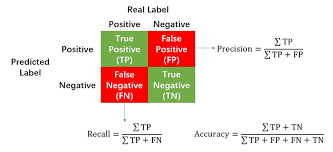

## Binary Classification

###  Linear Support Vector Machine Classifier with Linear Kernel (Binary Classification)

In [ ]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,y_bin, test_size=0.25, random_state=42)

In [ ]:
# using kernel as linear 
svm = SVC(kernel='linear',gamma='auto') 
svm.fit(X_train,y_train) # training model on training dataset

In [ ]:
y_pred = svm.predict(X_test) # predicting target attribute on testing dataset
ac = accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
print("LSVM-Classifier Binary Set-Accuracy is ", ac)

In [ ]:
# classification report
print(classification_report(y_test, y_pred,target_names=le1.classes_))

In [ ]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[400:600], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[400:600].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.ylim((-1,2))
plt.title("Quadratic SVM Binary Classification")
plt.show()

### Quadratic Support Vector Machine Classifier (Binary Classification)

In [ ]:
qsvm=SVC(kernel='poly',gamma='auto') # using kernal as polynomial for quadratic svm
qsvm.fit(X_train,y_train) # training model on training dataset

In [ ]:
y_pred=qsvm.predict(X_test) # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
print("QSVM-Classifier Binary Set-Accuracy is ", ac)

In [ ]:
# classification report
print(classification_report(y_test, y_pred,target_names=le1.classes_))

In [ ]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[400:600], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[400:600].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.ylim((-1,2))
plt.title("Quadratic SVM Binary Classification")
plt.show()

### K-nearest-neighbor Classifier (Binary Classification)

In [ ]:
knn=KNeighborsClassifier(n_neighbors=5) # creating model for 5 neighbors
knn.fit(X_train,y_train) # training model on training dataset

In [ ]:
y_pred=knn.predict(X_test) # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
print("KNN-Classifier Binary Set-Accuracy is ", ac)

In [ ]:
# classification report
print(classification_report(y_test, y_pred,target_names=le1.classes_))

In [ ]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[500:600], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[500:600].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.ylim((-1,2))
plt.title("KNN Binary Classification")
plt.show()

### Long Short-Term Memory Classifier (Binary Classification)

In [ ]:
X_train = X_train.values

In [ ]:
y_train = np.array(y_train)

In [ ]:
x_train = np.reshape(X_train, (X_train.shape[0],1,X_train.shape[1]))

In [ ]:
x_train.shape

In [ ]:
lst = Sequential()
# input layer and LSTM layer with 50 neurons
lst.add(LSTM(50,input_dim=122))

# outpute layer with sigmoid activation
lst.add(Dense(1,activation='sigmoid'))

In [ ]:
# defining loss function, optimizer, metrics and then compiling model
lst.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
# summary of model layers
lst.summary()

In [ ]:
# training the model on training dataset
history = lst.fit(x_train, y_train, epochs=20, batch_size=5000,validation_split=0.2)

In [ ]:
X_test = X_test.to_numpy()

In [ ]:
x_test = np.reshape(X_test, (X_test.shape[0],1,X_test.shape[1]))

In [ ]:
# defining loss function, optimizer, metrics and then compiling model
lst.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
# predicting target attribute on testing dataset
test_results = lst.evaluate(x_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

In [ ]:
# Plot of accuracy vs epoch of train and test dataset
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [ ]:
# Plot of loss vs epoch of train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [ ]:
y_test.shape

In [ ]:
y_pred = lst.predict(x_test)

In [ ]:
y_pred.shape

In [ ]:
y_pred = lst.predict(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = auc(fpr, tpr)

In [ ]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
y_classes = (lst.predict(x_test)>0.5).astype('int32')

In [ ]:
print("Recall Score - ",recall_score(y_test,y_classes))
print("F1 Score - ",f1_score(y_test,y_classes))
print("Precision Score - ",precision_score(y_test,y_classes))

## Multi-class Classification

### K-nearest-neighbor Classifier (Multi-class Classification)

In [ ]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,y_multi, test_size=0.25, random_state=42)

In [ ]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train) # training model on training dataset

In [ ]:
y_pred=knn.predict(X_test)  # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100  # calculating accuracy of predicted data
print("KNN-Classifier Multi-class Set-Accuracy is ", ac)

In [ ]:
# classification report
print(classification_report(y_test, y_pred,target_names=le2.classes_))

In [ ]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

### Multi Layer Perceptron Classifier (Multi-class Classification)

In [ ]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,y_multi, test_size=0.25, random_state=42)

In [ ]:
mlp = Sequential() # initializing model
# input layer and first layer with 50 neurons
mlp.add(Dense(units=50, input_dim=X_train.shape[1], activation='relu'))
# output layer with softmax activation
mlp.add(Dense(units=5,activation='softmax'))

In [ ]:
# defining loss function, optimizer, metrics and then compiling model
mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# summary of model layers
mlp.summary()

In [ ]:
# training the model on training dataset
history = mlp.fit(X_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)

In [ ]:
# defining loss function, optimizer, metrics and then compiling model
mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# predicting target attribute on testing dataset
test_results = mlp.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

In [ ]:
# Plot of accuracy vs epoch for train and test dataset
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
# Plot of loss vs epoch for train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()